In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,06/18/2016,00:33:00,4E,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1
1,06/18/2016,00:39:00,4B,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1
2,06/18/2016,0015,9S,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1
3,06/18/2016,01:53:00,3AF,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1
4,06/18/2016,02:05:00,6C,800 N WOLFE ST,I,NaN,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1
...,...,...,...,...,...,...,...,...,...,...,...
264491,01/01/2011,22:15:00,4D,6800 MCCLEAN BD,I,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"(39.3704700000, -76.5670500000)",1
264492,01/01/2011,22:30:00,6J,3000 ODONNELL ST,I,NaN,232.0,SOUTHEASTERN,Canton,"(39.2804600000, -76.5727300000)",1
264493,01/01/2011,23:00:00,7A,2500 ARUNAH AV,O,NaN,721.0,WESTERN,Evergreen Lawn,"(39.2954200000, -76.6592800000)",1
264494,01/01/2011,23:25:00,4E,100 N MONROE ST,I,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,"(39.2899900000, -76.6470700000)",1


In [3]:
set(df['District']) #the number of different districts in Baltimore

{'CENTRAL',
 'EASTERN',
 'NORTHEASTERN',
 'NORTHERN',
 'NORTHWESTERN',
 'SOUTHEASTERN',
 'SOUTHERN',
 'SOUTHWESTERN',
 'WESTERN',
 nan}

In [4]:
len(set(df['CrimeCode'])) #Number of different crime codes

81

In [5]:
t = df['Weapon'].value_counts().reset_index()

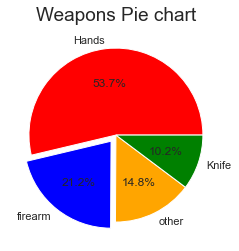

In [6]:
plt.pie(t['Weapon'], labels=['Hands','firearm','other','Knife'], colors = ['red','blue','orange','green'], autopct = '%0.1f%%', explode = [0.0,0.09,0.0,0.0])
plt.title('Weapons Pie chart', fontsize = 19)
plt.show()

In [7]:
df['CrimeCode'].value_counts().reset_index().head(10) #top 10 most popular crimes reported

,index,CrimeCode
0,4E,44691
1,6D,36261
2,5A,25561
3,7A,23080
4,6G,15468
5,6J,12127
6,6C,12083
7,6E,11902
8,4C,10401
9,5D,8107


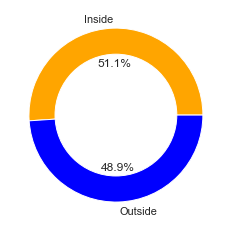

In [8]:
df['Description'].replace(to_replace = ['Inside', 'Outside'], value = ['I', 'O'], inplace = True)
y = df['Description'].value_counts().reset_index()
plt.pie(y['Description'], labels = ['Inside', 'Outside'], colors = ['orange', 'blue'], autopct = '%0.1f%%')
circle = plt.Circle(xy = (0,0), radius = 0.7, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show() # Inside or outside crimes pie chart

In [9]:
u = df['District'].value_counts()
u

NORTHEASTERN    42202
SOUTHEASTERN    36646
CENTRAL         31150
SOUTHERN        30376
NORTHERN        29616
NORTHWESTERN    26546
SOUTHWESTERN    24141
EASTERN         22294
WESTERN         21464
Name: District, dtype: int64

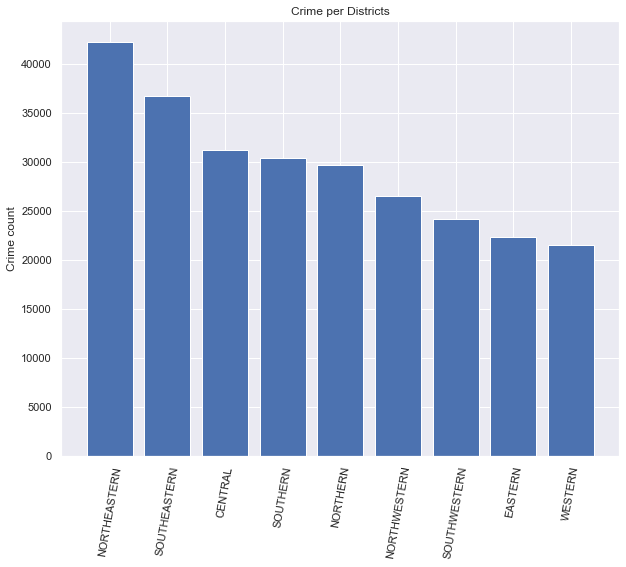

In [10]:
plt.figure(figsize = (10,8))
plt.bar(range(len(u)), u)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8], labels = ['NORTHEASTERN', 'SOUTHEASTERN', 'CENTRAL', 'SOUTHERN', 'NORTHERN','NORTHWESTERN', 'SOUTHWESTERN', 'EASTERN', 'WESTERN'], rotation = 80)
plt.title('Crime per Districts')
plt.ylabel('Crime count')
#plt.xlabel('Districts')
plt.show() # crime districts bar chart


In [11]:
df['CrimeTime'] = pd.to_timedelta(df['CrimeTime']) #convert CrimeTime to timedelta
df['Hour'] = df['CrimeTime'].dt.components['hours'] #split hour into a different column

In [12]:
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Hour
0,06/18/2016,0 days 00:33:00,4E,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1,0
1,06/18/2016,0 days 00:39:00,4B,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1,0
2,06/18/2016,0 days 00:00:00.000000015,9S,2400 CYLBURN AV,O,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1,0
3,06/18/2016,0 days 01:53:00,3AF,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1,1
4,06/18/2016,0 days 02:05:00,6C,800 N WOLFE ST,I,NaN,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
264491,01/01/2011,0 days 22:15:00,4D,6800 MCCLEAN BD,I,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"(39.3704700000, -76.5670500000)",1,22
264492,01/01/2011,0 days 22:30:00,6J,3000 ODONNELL ST,I,NaN,232.0,SOUTHEASTERN,Canton,"(39.2804600000, -76.5727300000)",1,22
264493,01/01/2011,0 days 23:00:00,7A,2500 ARUNAH AV,O,NaN,721.0,WESTERN,Evergreen Lawn,"(39.2954200000, -76.6592800000)",1,23
264494,01/01/2011,0 days 23:25:00,4E,100 N MONROE ST,I,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,"(39.2899900000, -76.6470700000)",1,23


In [13]:
df['Hour'].value_counts().reset_index().head(5) #top 5 crime hours

,index,Hour
0,18,15764
1,17,15324
2,15,15121
3,0,15005
4,16,14857


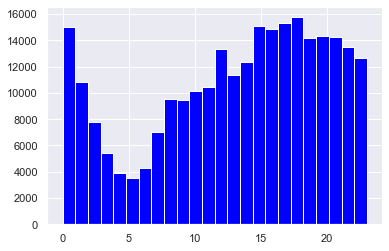

In [14]:
plt.hist(df['Hour'], bins = 24, color = 'blue')
plt.show() # distribution of crimes by hour

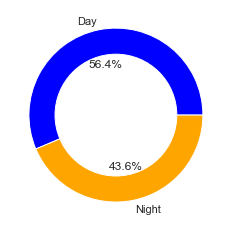

In [15]:
t= []
for i in list(df['Hour']): #loop through hour column, 
    if 5<i<19:             # define day as 6am to 6pm 
        t.append('Day')
    else:                  #define night as 6pm to 6am
        t.append('Night')
df['Time'] = t
time = df['Time'].value_counts().reset_index()
plt.pie(time['Time'], labels = ['Day', 'Night'], colors = ['blue', 'orange'], autopct = '%0.1f%%')
circle = plt.Circle(xy = (0,0), radius = 0.7, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show() #Day and Night crimes pie chart

## District Analysis
### 1. North Eastern District

In [16]:
Northeast = df.where(df['District'] == 'NORTHEASTERN').dropna() #mask only crimes that happened in Northeastern district
Northeast

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Hour,Time
0,06/18/2016,0 days 00:33:00,4E,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1.0,0.0,Night
14,06/18/2016,0 days 00:00:00.000002253,9S,4200 NICHOLAS AV,O,FIREARM,442.0,NORTHEASTERN,Belair-Edison,"(39.3292000000, -76.5640300000)",1.0,0.0,Night
30,06/18/2016,0 days 09:00:00,4E,6800 FAIRDEL AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3601500000, -76.5377600000)",1.0,9.0,Day
61,06/18/2016,0 days 18:33:00,4E,4900 FRANKFORD AVE,O,HANDS,444.0,NORTHEASTERN,Frankford,"(39.3315400000, -76.5438700000)",1.0,18.0,Day
62,06/18/2016,0 days 18:33:00,4E,4900 FRANKFORD AVE,O,HANDS,444.0,NORTHEASTERN,Frankford,"(39.3315400000, -76.5438700000)",1.0,18.0,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264447,01/01/2011,0 days 17:00:00,4E,3300 BELAIR RD,O,HANDS,432.0,NORTHEASTERN,Belair-Edison,"(39.3217100000, -76.5735700000)",1.0,17.0,Day
264449,01/01/2011,0 days 17:00:00,4E,5000 SINCLAIR LA,O,HANDS,443.0,NORTHEASTERN,Frankford,"(39.3221200000, -76.5479400000)",1.0,17.0,Day
264467,01/01/2011,0 days 19:30:00,4C,5100 BELAIR RD,O,OTHER,426.0,NORTHEASTERN,Waltherson,"(39.3362300000, -76.5544200000)",1.0,19.0,Night
264490,01/01/2011,0 days 22:15:00,4E,6800 MCCLEAN BD,I,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"(39.3704700000, -76.5670500000)",1.0,22.0,Night


In [17]:
Northeast['CrimeDate'] = pd.to_datetime(Northeast['CrimeDate']) #convert Crime date to datetime
Northeast['Year'] = Northeast['CrimeDate'].dt.year #define a new column as the year
Northeast['Month'] = Northeast['CrimeDate'].dt.month #define a new column that has the month value


In [18]:
grouped_yearly_monthly = Northeast.groupby(['Year','Month']).agg({"Total Incidents":np.sum}) #group data by year and month
y = grouped_yearly_monthly.reset_index() #reset the index
y.columns = ['Year', 'Month', 'Total Incidents']
y

,Year,Month,Total Incidents
0,2011,1,213.0
1,2011,2,178.0
2,2011,3,251.0
3,2011,4,276.0
4,2011,5,307.0
...,...,...,...
61,2016,2,130.0
62,2016,3,195.0
63,2016,4,183.0
64,2016,5,198.0


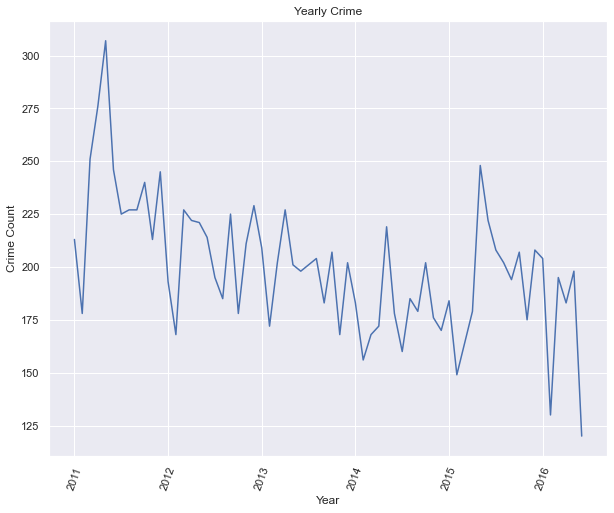

In [19]:
plt.figure(figsize = (10,8))
plt.plot(range(len(y['Total Incidents'])), y['Total Incidents'])
plt.xticks(np.arange(0,66, 12), ['2011', '2012', '2013', '2014', '2015', '2016'], rotation = 70) 
plt.title('Yearly Crime')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show() #line plot of the crimes monthly 

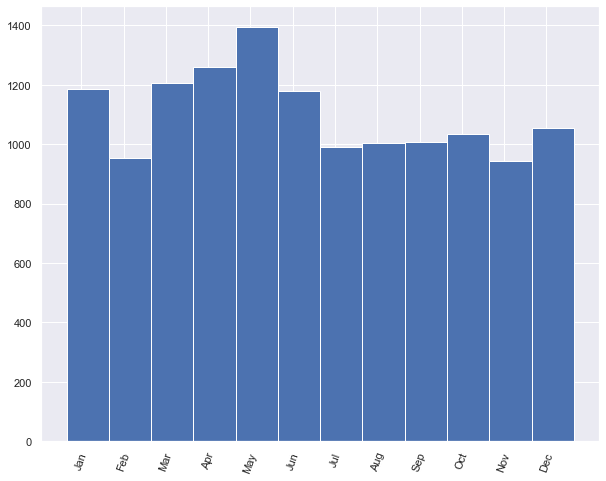

In [20]:
plt.figure(figsize = (10,8))
plt.hist(Northeast['Month'], bins = np.arange(1,14,1))
plt.xticks(np.arange(1.35,13.35,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 70)
plt.show() #distribution of crimes monthly 

In [21]:
t1 = Northeast['Weapon'].value_counts().reset_index() #define t1 that has the weapon and the number of times the weapon was used
t1

,index,Weapon
0,HANDS,7235
1,FIREARM,2979
2,OTHER,1794
3,KNIFE,1200


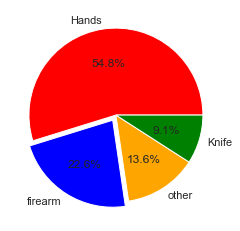

In [22]:
plt.pie(t1['Weapon'], labels=['Hands','firearm','other','Knife'], colors = ['red','blue','orange','green'], autopct = '%0.1f%%', explode = [0.0,0.07,0.0,0.0])
plt.show() #weapons choice pie chart

In [23]:
crime_time = Northeast['Time'].value_counts().reset_index()
crime_time # night and day crimes count

,index,Time
0,Night,7012
1,Day,6196


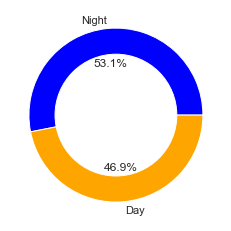

In [24]:
plt.pie(crime_time['Time'], labels = ['Night', 'Day'], colors = ['blue', 'orange'], autopct = '%0.1f%%')
circle = plt.Circle(xy = (0,0), radius = 0.7, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show() #day and night crimes pie chart

In [25]:
crime_hood = Northeast['Neighborhood'].value_counts().reset_index().head(5) #The top  5 Crime neighbourhoods
crime_hood 

,index,Neighborhood
0,Frankford,2231
1,Belair-Edison,1914
2,Coldstream Homestead Montebello,1392
3,Hamilton Hills,1094
4,Glenham-Belhar,491


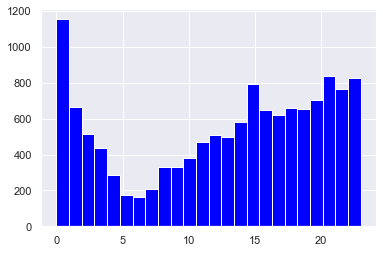

In [26]:
plt.hist(Northeast['Hour'], bins = 24, color = 'blue')
plt.show() #distribution of crimes by hours

In [27]:
day_crime = Northeast.where(Northeast['Time'] == 'Day')
day = day_crime['Neighborhood'].value_counts().reset_index().head(4)
day #top four crime neighborhoods during the day

,index,Neighborhood
0,Frankford,1057
1,Belair-Edison,841
2,Coldstream Homestead Montebello,689
3,Hamilton Hills,563


In [28]:
night_crime = Northeast.where(Northeast['Time'] == 'Night')
night = night_crime['Neighborhood'].value_counts().reset_index().head(4)
night #top four crime neighborhoods during the night

,index,Neighborhood
0,Frankford,1174
1,Belair-Edison,1073
2,Coldstream Homestead Montebello,703
3,Hamilton Hills,531


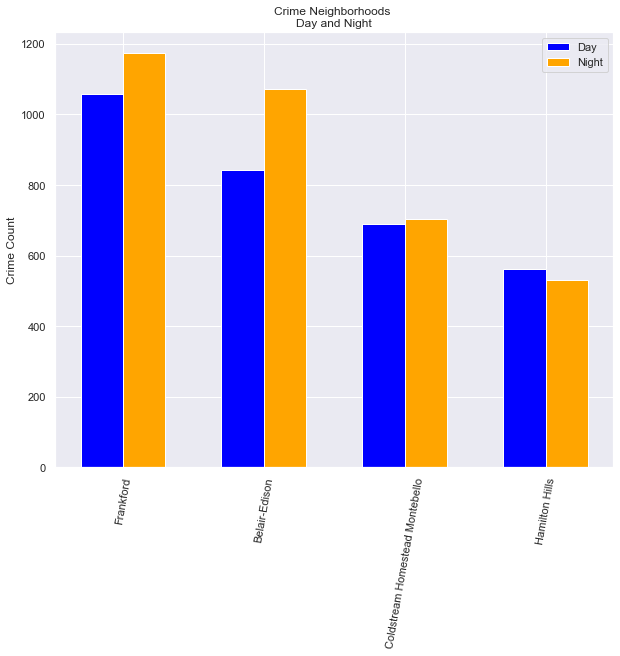

In [29]:
plt.figure(figsize = (10,8))
plt.bar(range(len(day['Neighborhood'])), day['Neighborhood'], width = 0.3,color = 'blue', label = 'Day')
plt.bar(np.arange(0.3, 4.3, 1), night['Neighborhood'], width = 0.3, color = 'orange', label = 'Night')
plt.xticks(np.arange(0.15,4.15, 1), list(night['index']), rotation = 80)
plt.title('Crime Neighborhoods \nDay and Night')
plt.ylabel('Crime Count')
plt.legend()
plt.show() #top crime neighborhoods day and night  

In [30]:
month_night = night_crime['Month'].value_counts().reset_index()
month_night = month_night.sort_values('index')
month_night #distribution of night crimes by month

,index,Month
2,1.0,633
11,2.0,473
6,3.0,592
3,4.0,616
0,5.0,722
1,6.0,691
5,7.0,600
4,8.0,612
8,9.0,534
9,10.0,504


In [31]:
month_day = day_crime['Month'].value_counts().reset_index()
month_day = month_day.sort_values('index')
month_day #distribution of day crimes by month

,index,Month
3,1.0,553
7,2.0,480
2,3.0,615
1,4.0,643
0,5.0,672
6,6.0,487
11,7.0,389
10,8.0,391
8,9.0,474
4,10.0,530


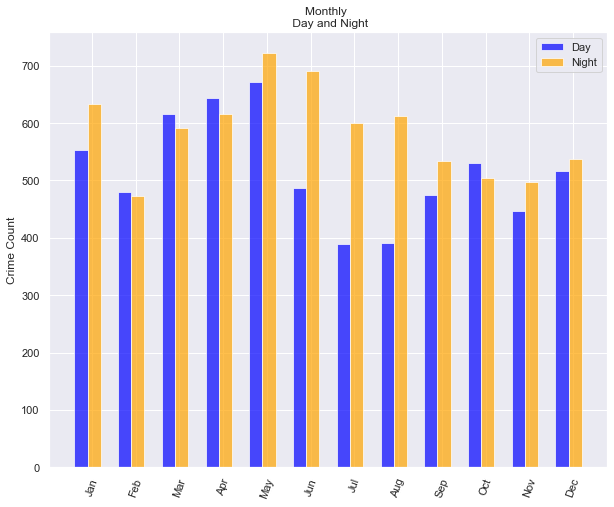

In [32]:
plt.figure(figsize = (10,8))
plt.bar(month_day['index'], month_day['Month'], width = 0.3, label = 'Day', color = 'blue', alpha = 0.7)
plt.bar(np.arange(1.3,13.3,1), month_night['Month'], width = 0.3, label = 'Night', color = 'orange', alpha = 0.7)
plt.title('Monthly \n Day and Night')
plt.ylabel('Crime Count')
plt.xticks(np.arange(1.25,13.25,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 70)
plt.legend()
plt.show() #day and night distribution by month

### 2. South Eastern District

In [33]:
Southeast = df.where(df['District'] == 'SOUTHEASTERN').dropna() #mask crimes that only happened in the southeastern districts
Southeast 

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Hour,Time
1,06/18/2016,0 days 00:39:00,4B,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1.0,0.0,Night
3,06/18/2016,0 days 01:53:00,3AF,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1.0,1.0,Night
5,06/18/2016,0 days 02:35:00,4C,ST & IMLA ST,O,OTHER,241.0,SOUTHEASTERN,Bayview,"(39.2891900000, -76.5391400000)",1.0,2.0,Night
6,06/18/2016,0 days 02:35:00,4C,ST & IMLA ST,O,OTHER,241.0,SOUTHEASTERN,Bayview,"(39.2891900000, -76.5391400000)",1.0,2.0,Night
38,06/18/2016,0 days 11:22:00,4E,1500 MAY CT,I,HANDS,212.0,SOUTHEASTERN,Dunbar-Broadway,"(39.2943500000, -76.5971000000)",1.0,11.0,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264360,01/01/2011,0 days 02:35:00,4D,2700 E FAIRMOUNT AV,I,HANDS,222.0,SOUTHEASTERN,Patterson Park Neighborhood,"(39.2932800000, -76.5786400000)",1.0,2.0,Night
264370,01/01/2011,0 days 03:40:00,4E,2300 BOSTON ST,I,HANDS,232.0,SOUTHEASTERN,Canton,"(39.2829700000, -76.5843800000)",1.0,3.0,Night
264444,01/01/2011,0 days 00:00:00.000001649,1F,500 N LAKEWOOD AV,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2970000000, -76.5793900000)",1.0,0.0,Night
264468,01/01/2011,0 days 19:45:30,2A,3300 ESTHER PL,I,OTHER,222.0,SOUTHEASTERN,Patterson Park Neighborhood,"(39.2941900000, -76.5705200000)",1.0,19.0,Night


In [34]:
Southeast['CrimeDate'] = pd.to_datetime(Southeast['CrimeDate'])
Southeast['Year'] = Southeast['CrimeDate'].dt.year
Southeast['Month'] = Southeast['CrimeDate'].dt.month

grouped_yearly = Southeast.groupby(['Year','Month']).agg({"Total Incidents":np.sum})
grouped_yearly = grouped_yearly.reset_index()
grouped_yearly # yearly and monthly grouped total incidents

,Year,Month,Total Incidents
0,2011,1,114.0
1,2011,2,111.0
2,2011,3,146.0
3,2011,4,200.0
4,2011,5,172.0
...,...,...,...
61,2016,2,119.0
62,2016,3,146.0
63,2016,4,186.0
64,2016,5,195.0


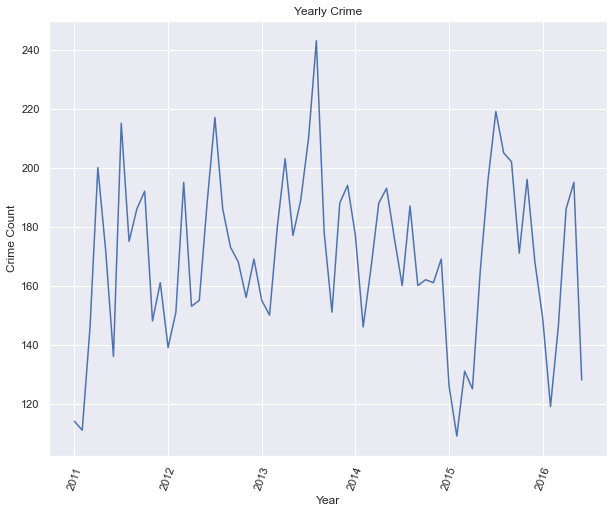

In [35]:
plt.figure(figsize = (10,8))
plt.plot(range(len(grouped_yearly['Total Incidents'])), grouped_yearly['Total Incidents'])
plt.xticks(np.arange(0,66, 12), ['2011', '2012', '2013', '2014', '2015', '2016'], rotation = 70)
plt.title('Yearly Crime')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show() #line plot of the crime count by month and year

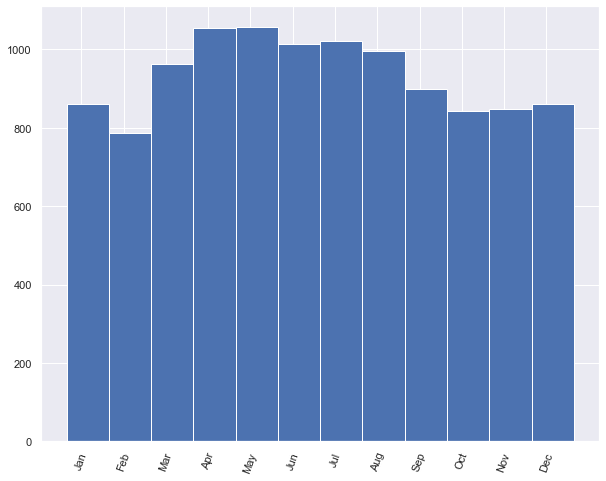

In [36]:
plt.figure(figsize = (10,8))
plt.hist(Southeast['Month'], bins = np.arange(1,14,1))
plt.xticks(np.arange(1.35,13.35,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 70)
plt.show() #distribution of crimes by month

In [37]:
weapon_choice = Southeast['Weapon'].value_counts().reset_index()
weapon_choice 

,index,Weapon
0,HANDS,6445
1,FIREARM,1887
2,OTHER,1623
3,KNIFE,1250


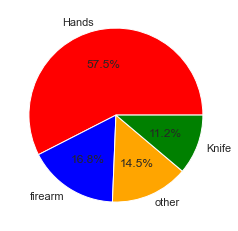

In [38]:
plt.pie(weapon_choice['Weapon'], labels=['Hands','firearm','other','Knife'], colors = ['red','blue','orange','green'], autopct = '%0.1f%%', explode = [0.0,0.0,0.0,0.0])
plt.show() #pie chart of the weapons choice in southeastern district

In [39]:
crime_times = Southeast['Time'].value_counts().reset_index()
crime_times

,index,Time
0,Night,6786
1,Day,4419


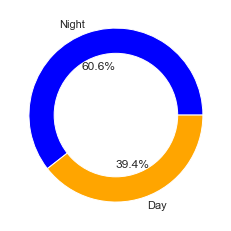

In [40]:
plt.pie(crime_times['Time'], labels = ['Night', 'Day'], colors = ['blue', 'orange'], autopct = '%0.1f%%')
circle = plt.Circle(xy = (0,0), radius = 0.71, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show() #crimes during the day and night pie chart

In [41]:
crime_hoods = Southeast['Neighborhood'].value_counts().reset_index().head(5) #The top  5 Crime neighbourhoods
crime_hoods #the top 5 crime neighborhoods in southeastern district

,index,Neighborhood
0,Fells Point,1034
1,McElderry Park,965
2,Patterson Park Neighborhood,921
3,Ellwood Park/Monument,871
4,Baltimore Highlands,783


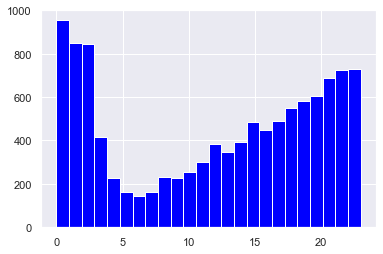

In [42]:
plt.hist(Southeast['Hour'], bins = 24, color = 'blue')
plt.show() #hourly distribution of crimes

In [43]:
day_crimes = Southeast.where(Southeast['Time'] == 'Day')
days = day_crimes['Neighborhood'].value_counts().reset_index().head(4)
days # top 5 crime neigborhoods by day

,index,Neighborhood
0,McElderry Park,375
1,Ellwood Park/Monument,364
2,Patterson Park Neighborhood,352
3,Fells Point,299


In [44]:
night_crimes = Southeast.where(Southeast['Time'] == 'Night')
nights = night_crimes['Neighborhood'].value_counts().reset_index().head(4)
nights #top 4 crime neighborhoods by night

,index,Neighborhood
0,Fells Point,735
1,McElderry Park,590
2,Patterson Park Neighborhood,569
3,Baltimore Highlands,517


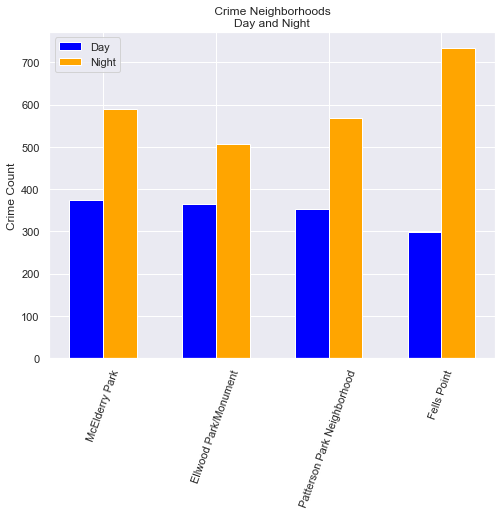

In [45]:
plt.figure(figsize = (8,6))
plt.bar(range(len(days['Neighborhood'])), days['Neighborhood'], width = 0.3, label = 'Day', color = 'blue')
plt.bar(np.arange(0.3,4.3,1), [590,507,569, 735], width = 0.3, label = 'Night', color = 'orange')
plt.xticks(np.arange(0.15,4.15, 1), list(days['index']), rotation = 70)
plt.legend()
plt.title(' Crime Neighborhoods \nDay and Night')
plt.ylabel('Crime Count')
plt.show() #grouped bar charts of the top 4 crime neighborhoods 

In [46]:
monthly_night = night_crimes['Month'].value_counts().reset_index()
monthly_night = monthly_night.sort_values('index')
monthly_night #monthly distribution of night crimes

,index,Month
9,1.0,504
11,2.0,451
5,3.0,554
2,4.0,634
3,5.0,632
4,6.0,604
0,7.0,686
1,8.0,651
6,9.0,551
10,10.0,488


In [47]:
monthly_day = day_crimes['Month'].value_counts().reset_index()
monthly_day = monthly_day.sort_values('index')
monthly_day #monthly distribution of day crimes

,index,Month
5,1.0,356
11,2.0,335
2,3.0,410
1,4.0,421
0,5.0,425
3,6.0,409
10,7.0,335
7,8.0,345
6,9.0,348
4,10.0,356


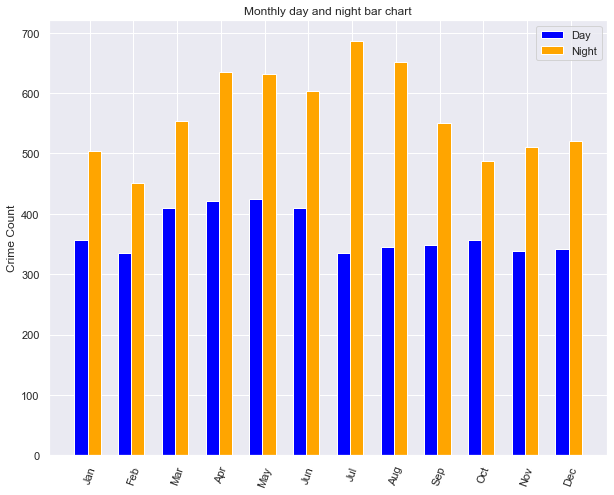

In [48]:
plt.figure(figsize = (10,8))
plt.bar(monthly_day['index'], monthly_day['Month'], width = 0.3, label = 'Day', color = 'blue')
plt.bar(np.arange(1.3,13.3, 1), monthly_night['Month'], width = 0.3, label = 'Night', color = 'orange')
plt.xticks(np.arange(1.2,13.2, 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 70)
plt.ylabel('Crime Count')
plt.title('Monthly day and night bar chart')
plt.legend()
plt.show() #grouped bar charts of monthly distribution of day and night crimes

### 3. Central District

In [49]:
Central = df.where(df['District'] == 'CENTRAL').dropna() #mask crimes that wer only commited in the CEntral district
Central

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Hour,Time
10,06/18/2016,0 days 04:00:00,3AF,200 N LIBERTY ST,O,FIREARM,111.0,CENTRAL,Downtown,"(39.2917300000, -76.6171300000)",1.0,4.0,Night
35,06/18/2016,0 days 10:10:00,3GO,400 W FRANKLIN ST,I,OTHER,111.0,CENTRAL,Downtown,"(39.2948300000, -76.6220500000)",1.0,10.0,Day
92,06/17/2016,0 days 07:08:00,3CK,400 E PRATT ST,I,KNIFE,112.0,CENTRAL,Inner Harbor,"(39.2866800000, -76.6098000000)",1.0,7.0,Day
111,06/17/2016,0 days 12:00:00,4E,200 E PRATT ST,O,HANDS,112.0,CENTRAL,Inner Harbor,"(39.2865900000, -76.6120400000)",1.0,12.0,Day
167,06/17/2016,0 days 22:30:00,4E,0 S GREENE ST,O,HANDS,121.0,CENTRAL,University Of Maryland,"(39.2882900000, -76.6236700000)",1.0,22.0,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264365,01/01/2011,0 days 03:00:00,4E,200 E REDWOOD ST,O,HANDS,111.0,CENTRAL,Downtown,"(39.2889200000, -76.6121700000)",1.0,3.0,Night
264366,01/01/2011,0 days 03:00:00,4E,200 E REDWOOD ST,O,HANDS,111.0,CENTRAL,Downtown,"(39.2889200000, -76.6121700000)",1.0,3.0,Night
264372,01/01/2011,0 days 04:00:00,4E,500 E BALTIMORE ST,O,HANDS,111.0,CENTRAL,Downtown,"(39.2898100000, -76.6088200000)",1.0,4.0,Night
264375,01/01/2011,0 days 04:30:00,4E,100 MARKET PL,O,HANDS,112.0,CENTRAL,Inner Harbor,"(39.2875200000, -76.6069400000)",1.0,4.0,Night


In [50]:
Central['CrimeDate'] = pd.to_datetime(Central['CrimeDate'])
Central['Year'] = Central['CrimeDate'].dt.year
Central['Month'] = Central['CrimeDate'].dt.month

group_yearly = Central.groupby(['Year','Month']).agg({"Total Incidents":np.sum})
group_yearly = group_yearly.reset_index()
group_yearly #grouped monthly and yearly incidents in the central districts

,Year,Month,Total Incidents
0,2011,1,124.0
1,2011,2,140.0
2,2011,3,122.0
3,2011,4,166.0
4,2011,5,212.0
...,...,...,...
61,2016,2,130.0
62,2016,3,145.0
63,2016,4,141.0
64,2016,5,190.0


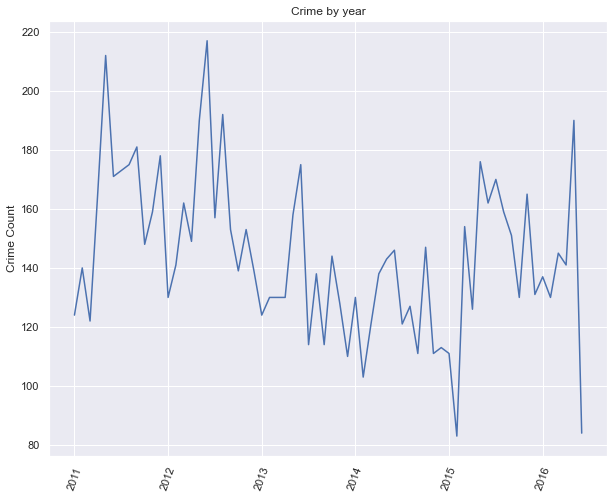

In [51]:
plt.figure(figsize = (10,8))
plt.plot(range(len(group_yearly['Total Incidents'])), group_yearly['Total Incidents'])
plt.ylabel('Crime Count')
plt.title('Crime by year')
plt.xticks(np.arange(0,66, 12), ['2011', '2012', '2013', '2014', '2015', '2016'], rotation = 70)
plt.show()# line plot of the monthly crimes 2011-2016

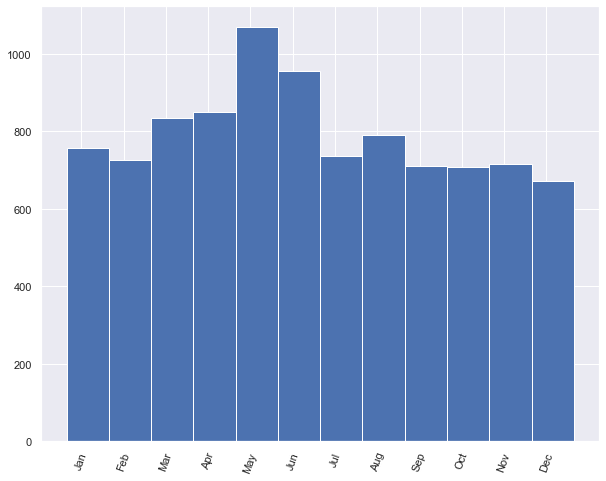

In [52]:
plt.figure(figsize = (10,8))
plt.hist(Central['Month'], bins = np.arange(1,14,1))
plt.xticks(np.arange(1.35,13.35,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 70)
plt.show() #monthly distribution of crimes 

In [53]:
weapons_choice = Central['Weapon'].value_counts().reset_index()
weapons_choice 

,index,Weapon
0,HANDS,5402
1,FIREARM,1602
2,OTHER,1368
3,KNIFE,1150


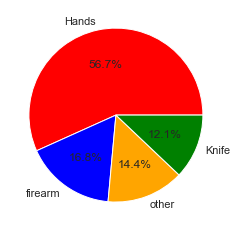

In [54]:
plt.pie(weapons_choice['Weapon'], labels=['Hands','firearm','other','Knife'], colors = ['red','blue','orange','green'], autopct = '%0.1f%%', explode = [0.0,0.0,0.0,0.0])
plt.show() # weapons choice pie chart

In [55]:
crime_times = Central['Time'].value_counts().reset_index()
crime_times

,index,Time
0,Night,5332
1,Day,4190


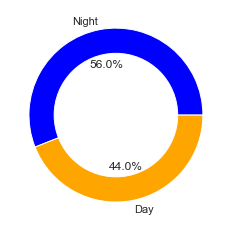

In [56]:
plt.pie(crime_times['Time'], labels = ['Night', 'Day'], colors = ['blue', 'orange'], autopct = '%0.1f%%')
circle = plt.Circle(xy = (0,0), radius = 0.71, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show() #day and night crimes donut chart

In [57]:
crime_hoods = Central['Neighborhood'].value_counts().reset_index().head(5) #The top  5 Crime neighbourhoods
crime_hoods #top 5 crime neighborhoods

,index,Neighborhood
0,Downtown,3093
1,Upton,1445
2,Reservoir Hill,875
3,Mount Vernon,570
4,Madison Park,536


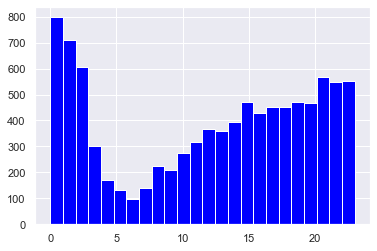

In [58]:
plt.hist(Central['Hour'], bins = 24, color = 'blue')
plt.show() #hourly distribution of crimes

In [59]:
day_crimes = Central.where(Central['Time'] == 'Day')
days = day_crimes['Neighborhood'].value_counts().reset_index().head(4)
days #top 4 crime neighborhoods during the day

,index,Neighborhood
0,Downtown,1318
1,Upton,683
2,Reservoir Hill,395
3,Madison Park,266


In [60]:
night_crimes = Central.where(Central['Time'] == 'Night')
nights = night_crimes['Neighborhood'].value_counts().reset_index().head(5)
nights #top 5 crime neighborhoods during the night

,index,Neighborhood
0,Downtown,1775
1,Upton,762
2,Reservoir Hill,480
3,Mount Vernon,332
4,Mid-Town Belvedere,291


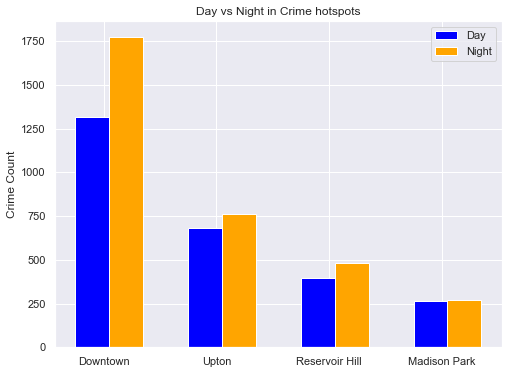

In [61]:
plt.figure(figsize = (8,6))
plt.bar(range(len(days['Neighborhood'])), days['Neighborhood'], width = 0.3, label = 'Day', color = 'blue')
plt.bar(np.arange(0.3, 4.3, 1), [1775,762,480,270], width = 0.3, label = 'Night', color = 'orange')
plt.legend()
plt.title('Day vs Night in Crime hotspots')
plt.ylabel('Crime Count')
plt.xticks(np.arange(0.1,4.1, 1), days['index'])
plt.show() #top 4 crime neighborhoods day and night grouped bar charts

In [62]:
monthly_night = night_crimes['Month'].value_counts().reset_index()
monthly_night = monthly_night.sort_values('index')
monthly_night #monthly distribution of night crimes in the central districts

,index,Month
8,1.0,392
9,2.0,374
5,3.0,440
3,4.0,465
0,5.0,615
1,6.0,593
4,7.0,448
2,8.0,480
6,9.0,427
7,10.0,398


In [63]:
monthly_day = day_crimes['Month'].value_counts().reset_index()
monthly_day = monthly_day.sort_values('index')
monthly_day # monthly distribution of day crimes in the central district

,index,Month
3,1.0,364
5,2.0,353
1,3.0,394
2,4.0,385
0,5.0,454
4,6.0,362
10,7.0,287
8,8.0,311
11,9.0,283
9,10.0,310


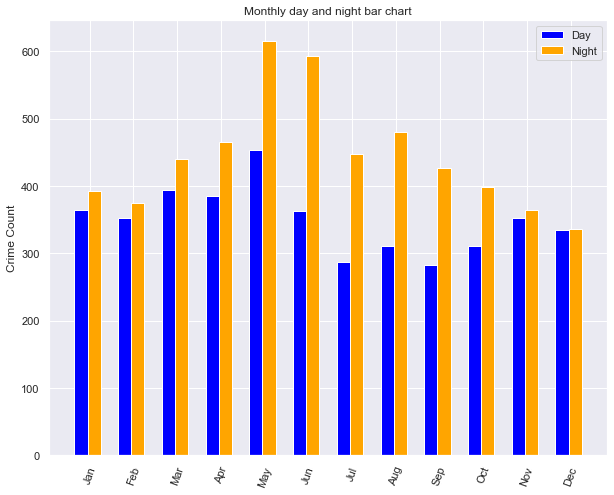

In [64]:
plt.figure(figsize = (10,8))
plt.bar(monthly_day['index'], monthly_day['Month'], width = 0.3, label = 'Day', color = 'blue')
plt.bar(np.arange(1.3,13.3, 1), monthly_night['Month'], width = 0.3, label = 'Night', color = 'orange')
plt.xticks(np.arange(1.2,13.2, 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 70)
plt.ylabel('Crime Count')
plt.title('Monthly day and night bar chart')
plt.legend()
plt.show() #grouped bar charts of distribution of day and night crimes  by month

In [65]:
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Hour,Time
0,06/18/2016,0 days 00:33:00,4E,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1,0,Night
1,06/18/2016,0 days 00:39:00,4B,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1,0,Night
2,06/18/2016,0 days 00:00:00.000000015,9S,2400 CYLBURN AV,O,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1,0,Night
3,06/18/2016,0 days 01:53:00,3AF,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1,1,Night
4,06/18/2016,0 days 02:05:00,6C,800 N WOLFE ST,I,NaN,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1,2,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264491,01/01/2011,0 days 22:15:00,4D,6800 MCCLEAN BD,I,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"(39.3704700000, -76.5670500000)",1,22,Night
264492,01/01/2011,0 days 22:30:00,6J,3000 ODONNELL ST,I,NaN,232.0,SOUTHEASTERN,Canton,"(39.2804600000, -76.5727300000)",1,22,Night
264493,01/01/2011,0 days 23:00:00,7A,2500 ARUNAH AV,O,NaN,721.0,WESTERN,Evergreen Lawn,"(39.2954200000, -76.6592800000)",1,23,Night
264494,01/01/2011,0 days 23:25:00,4E,100 N MONROE ST,I,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,"(39.2899900000, -76.6470700000)",1,23,Night


In [66]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month

group_yearly = df.groupby(['Year','Month']).agg({"Total Incidents":np.sum})
group_yearly = group_yearly.reset_index()
group_yearly #grouped total crimes distribution in Baltimore

,Year,Month,Total Incidents
0,2011,1,3440
1,2011,2,3108
2,2011,3,4269
3,2011,4,4149
4,2011,5,4516
...,...,...,...
61,2016,2,2857
62,2016,3,3585
63,2016,4,3781
64,2016,5,4094


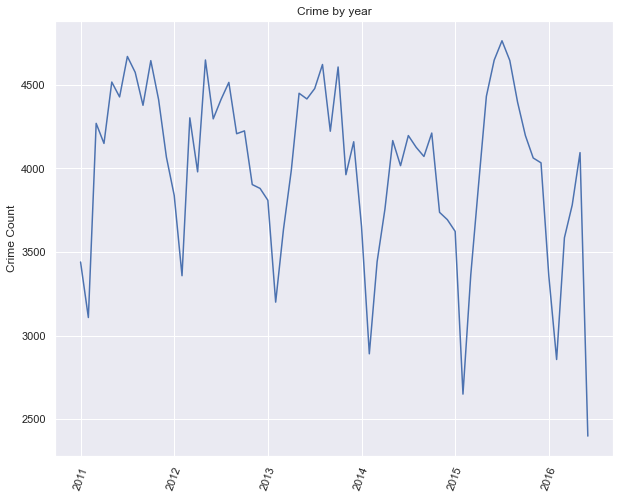

In [67]:
plt.figure(figsize = (10,8))
plt.plot(range(len(group_yearly['Total Incidents'])), group_yearly['Total Incidents'])
plt.ylabel('Crime Count')
plt.title('Crime by year')
plt.xticks(np.arange(0,66, 12), ['2011', '2012', '2013', '2014', '2015', '2016'], rotation = 70)
plt.show() # the line plot of monthly crimes 2011-2016

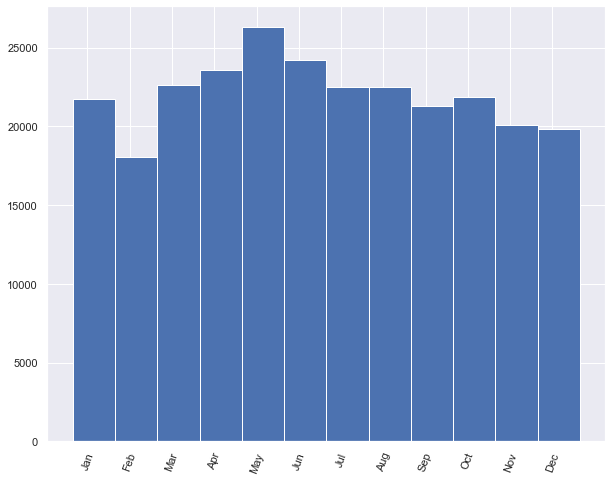

In [68]:
plt.figure(figsize = (10,8))
plt.hist(df['Month'], bins = np.arange(1,14,1))
plt.xticks(np.arange(1.35,13.35,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 70)
plt.show() #monthly distribution of crimes by month 